## Preprocesamiento de datos

In [5]:
import pandas as pd 

df = pd.read_csv('data/Client_segment_MODIFICADO.csv', sep=';', encoding='ISO-8859-1')

dict_prov = {'i\x81vila': 'Avila', 'Almeri\xada': 'Almeria', 'i\x81lava': 'Alava', 'La Corui±a': 'La Coruña', 'Guipiºzcoa': 'Guipuzcoa'}

for key, value in dict_prov.items():
    df['Provincia'] = df['Provincia'].replace(key, value)

print(len(df))
df

10806


,ID,Genero,Casado,Edad,Graduado,Profesion,Experiencia laboral,Gastoscore,Family_Size,anno_nacimiento,Generacion,Ingresos anuales brutos,Provincia,Digital_encuesta,Gasto_medio_mensual_cuota,Abandono,Dias_cliente,Campanna_anno
0,CLI2,M,No,24,No,Funcionario,<10annos,Bajo,4,2000,Generacion Z,13945,Malaga,"1,029",30,0,278,NaN
1,CLI3,F,Si,42,Si,Ingeniero,+20annos,Medio,3,1982,Millennials,118107,Salamanca,"1,79",30,0,455,3
2,CLI4,F,Si,74,Si,Ingeniero,+20annos,Bajo,1,1950,Generacion X,53533,Burgos,"1,326",50,0,380,1
3,CLI5,M,Si,74,Si,Servicios,+20annos,Alto,2,1950,Generacion X,82273,Gerona,"0,779",50,1,387,3
4,CLI6,F,Si,44,Si,Otros,+20annos,Alto,6,1980,Generacion X,90776,Avila,"1,767",30,1,299,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10801,CLI10803,F,No,35,Si,Funcionario,10-20annos,Bajo,1,1989,Millennials,22751,Madrid,"1,675",30,0,212,NaN
10802,CLI10804,M,No,34,No,Funcionario,10-20annos,Bajo,5,1990,Millennials,29184,Madrid,"1,836",30,1,210,NaN
10803,CLI10805,F,No,46,Si,Negocios/empresa,+20annos,Bajo,1,1978,Generacion X,69622,Madrid,"1,189",50,0,363,"0,5"
10804,CLI10806,M,Si,46,Si,Otros,+20annos,Medio,4,1978,Generacion X,49328,Madrid,"1,346",30,0,140,NaN


### Valores Nulos

In [2]:
df_nulls = pd.DataFrame(df.isnull().sum(), index=df.columns, columns=['Nulos'])
df_nulls

,Nulos
ID,0
Genero,0
Casado,190
Edad,0
Graduado,103
Profesion,0
Experiencia laboral,0
Gastoscore,0
Family_Size,0
anno_nacimiento,0


In [3]:
null_df = df[['Casado', 'Graduado', 'Campanna_anno']]
null_df

,Casado,Graduado,Campanna_anno
0,No,No,NaN
1,Si,Si,3
2,Si,Si,1
3,Si,Si,3
4,Si,Si,NaN
...,...,...,...
10801,No,Si,NaN
10802,No,No,NaN
10803,No,Si,"0,5"
10804,Si,Si,NaN


Vamos a ver la distribucion de Campanna_anno

count     5099
unique       4
top          3
freq      1865
Name: Campanna_anno, dtype: object


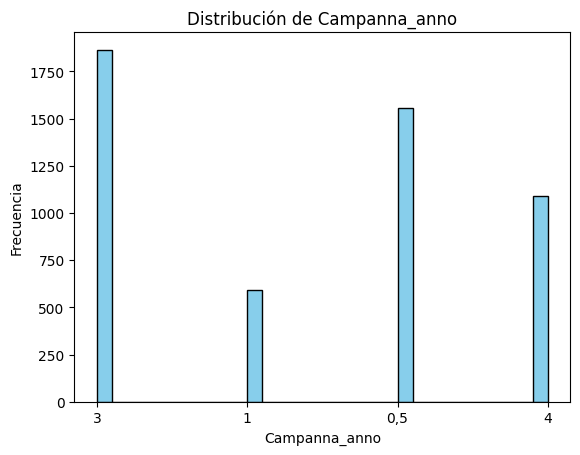

In [6]:
import matplotlib.pyplot as plt

# Estadísticas básicas
print(df['Campanna_anno'].describe())

# Visualización
plt.hist(df['Campanna_anno'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de Campanna_anno')
plt.xlabel('Campanna_anno')
plt.ylabel('Frecuencia')
plt.show()

Vemos que los valores de esta columna son siempre 0.5, 1, 3 o 4, lo que nos indica que puede ser interpretada como una variable categorica. No obstante vamos a sustituir los valores faltantes por 0 ya que se entiende que el descuento en ese año hacia el cliente no ha existido, es decir, es 0.

In [8]:
df.fillna({'Campanna_anno': 0}, inplace=True)
df.dropna(subset=['Casado', 'Graduado'], inplace=True)
df.drop(columns=['ID'], inplace=True)

df_nulls = pd.DataFrame(df.isnull().sum(), index=df.columns, columns=['Nulos'])
df_nulls

,Nulos
ID,0
Genero,0
Casado,0
Edad,0
Graduado,0
Profesion,0
Experiencia laboral,0
Gastoscore,0
Family_Size,0
anno_nacimiento,0
